In [9]:
%matplotlib inline
!pip install geopandas
import pandas as pd
import geopandas

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!pip install contextily
import contextily as ctx 

In [17]:
Piste_Ciclabili = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/bike_ciclabili/bike_ciclabili.dbf')
Quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm/NIL_WM.dbf')
Fontanelle = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Fontanelle/Fontanelle_OSM_ODbL.dbf")
Parchi = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Parchi_regionali_e_nazionali_polygon/Parchi_regionali_e_nazionali_polygon.dbf")
Comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g")
Province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g")
Regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g")
Corsi_DAcqua = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Corsi_acqua_Piano_di_Gestione/Corsi_acqua_Piano_di_Gestione.dbf")

1. visualizzi su una mappa i 10 corsi d'acqua più lunghi della provincia di Milano


In [18]:
Prov_Milano = Province[Province['DEN_UTS']=='Milano']
Prov_Milano

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09,"MULTIPOLYGON (((538136.289 5004372.814, 539162..."


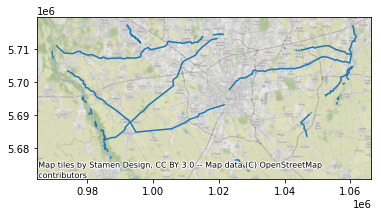

In [19]:
Corsi_DAcqua_Milano = Corsi_DAcqua[Corsi_DAcqua.intersects(Prov_Milano.unary_union)]
CorsiPiùLunghi = Corsi_DAcqua_Milano.sort_values('SHAPE_LEN',ascending=False).head(10)
ax = CorsiPiùLunghi.to_crs(epsg=3857).plot() 
ctx.add_basemap(ax)

2. visualizzi su una mappa i Navigli e i fiumi da cui prendono l'acqua. Utilizzare colori diversi per rappresentare i navigli rispetto ai fiumi ed evidenziare bene i percorsi sulla mappa


In [ ]:
Navigli = Corsi_DAcqua[Corsi_DAqcua.NOME.str.contains('Navigli')]
Navigli

In [23]:
Fiumi_Navigli = Corsi_DAcqua[Corsi_DAcqua.touches(Navigli.unary_union)]
Fiumi_Navigli

,OBJECTID,COD_PTUA16,NATURA,REGIONE,NOME,SOTTOBACIN,TIPOLOGIA,A_PROTETTA,SENSIBILE,VULNERABIL,D_HABITAT,D_UCCELLI,RAMSAR,BALNEAZION,VITA_PESCI,USO_POTAB,AREE_A_PR,BACINO,RAGG_ECO,RAGG_CHI,STATO_ECO,CONF_ECO,STATO_CHI,CONF_CHI,ANNI_CHI,ANNI_ECO,OBB_CHI,OBB_ECO,ESENZIONI,SHAPE_LEN,geometry
6,282,IT03POLSRECA1LO,artificiale,Lombardia,Redefossi (Cavo),nd,06SS1N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,18403.681560,"LINESTRING (514894.561 5036362.164, 514898.993..."
20,170,IT03N0080011911303081LO,naturale,Lombardia,Vallone (Rio),Adda Sub Lacuale (Asta),06IN7N,sì,no,sì,no,no,no,no,no,no,no,ADDA,sì,sì,scarso,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,15071.263294,"LINESTRING (534665.365 5048814.505, 534665.277..."
22,323,IT03N00800110LO,naturale,Lombardia,Adda (Fiume),Adda Sub Lacuale (Asta),06GL2N,sì,sì,sì,no,no,no,no,sì,no,sì,ADDA,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,16721.551152,"MULTILINESTRING ((540405.663 5051150.915, 5404..."
28,448,IT03N008001091014LO,naturale,Lombardia,Seveso (Torrente),Seveso,06SS3D,sì,no,sì,no,no,no,no,no,no,sì,LAMBRO - OLONA MERIDIONALE,no,no,cattivo,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,18469.448374,"LINESTRING (512157.688 5048463.394, 512157.976..."
39,619,IT03N0080440021LO,naturale,Lombardia,Lambro Meridionale (Colatore),Lambro (Asta),06SS3D,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,11169.001938,"LINESTRING (513185.093 5030112.328, 513188.599..."


In [ ]:
ax = Fiumi_Navigli.to_crs(epsg=3857).plot()


3. visualizzi su una mappa i corsi d'acqua che passano in un comune inserito dall'utente


Nome Comune: Bresso


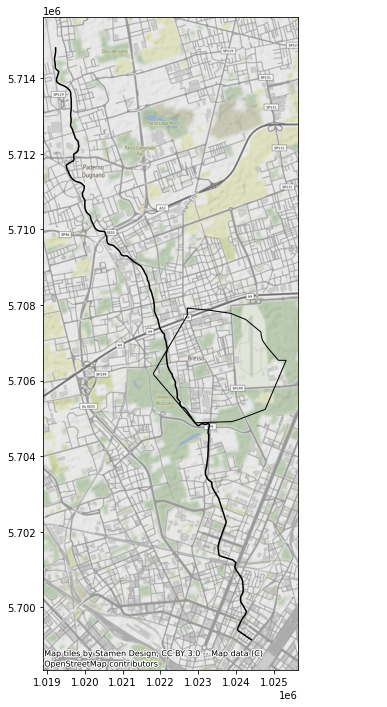

In [25]:
user = input("Nome Comune: ")
lst = list(Comuni['COMUNE'])
if user not in lst:
  print("Comune inesistente")
else:
  Comune_User = Comuni[Comuni.COMUNE==user]
  CorsiComune = Corsi_DAcqua[Corsi_DAcqua.intersects(Comune_User.unary_union)]
  ax = CorsiComune.to_crs(epsg=3857).plot(figsize=(20,12),facecolor='none',edgecolor='k')
  Comune_User.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
  ctx.add_basemap(ax)
#come fare a visualizzare solo la parte di fiume contenuta dal comune????

4. visualizzi su una mappa un fiume inserito dall'utente con tutti i comuni  che attraversa. Se attraversa Milano, visualizzare solo i quartieri che attraversa




Nome fiume: Lambro (Fiume)


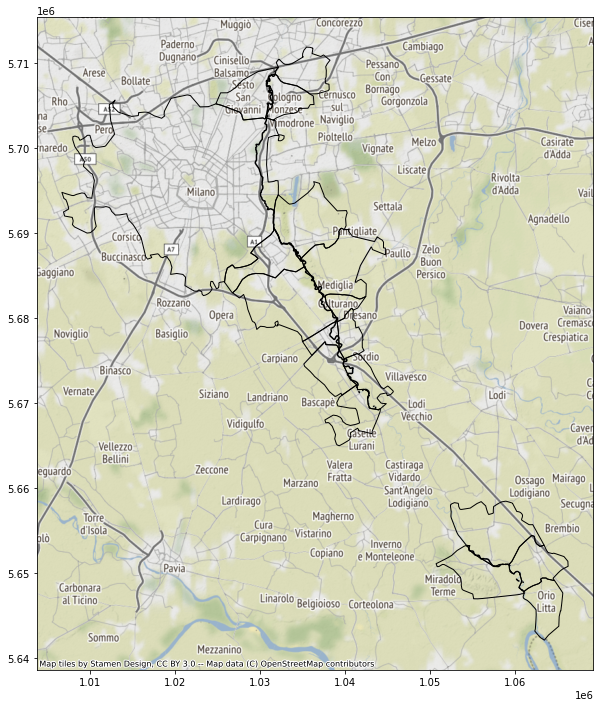

In [31]:
user = input("Nome fiume: ")
lst = list(Corsi_DAcqua['NOME'])
if user not in lst:
  print("Fiume inesistente")
else:
  Fiume_User = Corsi_DAcqua[Corsi_DAcqua.NOME==user]
  Comuni_Fiume_User = Comuni[Comuni.intersects(Fiume_User.unary_union)]
  ax = Comuni_Fiume_User.to_crs(epsg=3857).plot(figsize=(20,12),facecolor='none',edgecolor='k')
  Fiume_User.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
  ctx.add_basemap(ax)

5. visualizzi il numero di corsi d'acqua della provincia di Milano e la lunghezza totale di tutti i corsi d'acqua


6. visualizzi su unamappa i comuni della provincia di Milano che non sono attraversati da corsi d'acqua